In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import datetime as dt
import time
import datetime
from textblob import TextBlob
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
import operator
import re
from addictionStudy_2 import getNGrams

[nltk_data] Downloading package punkt to /Users/nayza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nayza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# This Function will take in a column, add a new column of sentiments to it

def getSentimentPolarity(df, col): 
    df['sentiment'] = df[col].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

In [4]:
# reading in the csv files from local source
# This is stopdrinking data

df_S = pd.read_csv('/Users/nayza/Downloads/stopdrinking_allsubmissions.csv') 
# not .tsv file so no separator specified
dfS = df_S.drop_duplicates(subset=['selftext'])
    
df_C = pd.read_csv('/Users/nayza/Downloads/stopdrinking_allcomments.csv')
dfC = df_C.drop_duplicates(subset=['body'])

In [5]:
# splitting the comments and submissions files into one before covid and one during covid

beforedf_C =dfC.loc[df_C['created_utc'] < datetime.datetime(2020, 3, 10, 0, 0).timestamp()]
afterdf_C =dfC.loc[df_C['created_utc'] > datetime.datetime(2020, 3, 11, 0, 0).timestamp()]
    
beforedf_S =dfS.loc[df_S['created_utc'] < datetime.datetime(2020, 3, 10, 0, 0).timestamp()]
afterdf_S =dfS.loc[df_S['created_utc'] > datetime.datetime(2020, 3, 11, 0, 0).timestamp()]

In [6]:
dfS.head()

,author,selftext,created_utc,score,subreddit,date_normal,year,year-month
0,doihavetocommit,I start hiking the Appalachian trail tomorrow....,1527738637,39,stopdrinking,2018-05-30 23:50:37,2018,2018-05
1,cloud_messenger,I was at a family event this past memorial wee...,1527737888,2,stopdrinking,2018-05-30 23:38:08,2018,2018-05
2,Beerforthefear,"I went to a concert tonight, and I was, and am...",1527737706,8,stopdrinking,2018-05-30 23:35:06,2018,2018-05
3,Shiitbagsailor,Can some of you share your physical sensations...,1527736519,2,stopdrinking,2018-05-30 23:15:19,2018,2018-05
4,zotbot77,I binged for 6 days straight. Wasn't a bender ...,1527736047,6,stopdrinking,2018-05-30 23:07:27,2018,2018-05


In [7]:
temp_dfS = dfS[['author', 'selftext', 'subreddit', 'date_normal']]
temp_dfS.head()

,author,selftext,subreddit,date_normal
0,doihavetocommit,I start hiking the Appalachian trail tomorrow....,stopdrinking,2018-05-30 23:50:37
1,cloud_messenger,I was at a family event this past memorial wee...,stopdrinking,2018-05-30 23:38:08
2,Beerforthefear,"I went to a concert tonight, and I was, and am...",stopdrinking,2018-05-30 23:35:06
3,Shiitbagsailor,Can some of you share your physical sensations...,stopdrinking,2018-05-30 23:15:19
4,zotbot77,I binged for 6 days straight. Wasn't a bender ...,stopdrinking,2018-05-30 23:07:27


In [ ]:
# DON'T run the cells below yet !!!!!!!

In [8]:
df_S = getSentimentPolarity(dfS, 'selftext') # calling on getSentimentPolarity() function to get the sent polar values
df_S.head()

/var/folders/8_/94pckqjd52dgrgd_fxmw31280000gp/T/ipykernel_11633/3741469433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df[col].apply(lambda x: TextBlob(x).sentiment.polarity)


,author,selftext,created_utc,score,subreddit,date_normal,year,year-month,sentiment
0,doihavetocommit,I start hiking the Appalachian trail tomorrow....,1527738637,39,stopdrinking,2018-05-30 23:50:37,2018,2018-05,0.240000
1,cloud_messenger,I was at a family event this past memorial wee...,1527737888,2,stopdrinking,2018-05-30 23:38:08,2018,2018-05,-0.158333
2,Beerforthefear,"I went to a concert tonight, and I was, and am...",1527737706,8,stopdrinking,2018-05-30 23:35:06,2018,2018-05,0.236276
3,Shiitbagsailor,Can some of you share your physical sensations...,1527736519,2,stopdrinking,2018-05-30 23:15:19,2018,2018-05,0.137500
4,zotbot77,I binged for 6 days straight. Wasn't a bender ...,1527736047,6,stopdrinking,2018-05-30 23:07:27,2018,2018-05,-0.035920


In [9]:
df_C = getSentimentPolarity(dfC, 'body')
df_C.head()

/var/folders/8_/94pckqjd52dgrgd_fxmw31280000gp/T/ipykernel_11633/3741469433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df[col].apply(lambda x: TextBlob(x).sentiment.polarity)


,author,body,created_utc,score,subreddit,date_normal,year,year-month,sentiment
0,BurnerPerkins,Definitely was in my top five reasons!,1527739163,3,stopdrinking,2018-05-30 23:59:23,2018,2018-05,0.312500
1,TheWoodBotherer,"Oh yes, I forgot about that!\n\nA day or two o...",1527739141,1,stopdrinking,2018-05-30 23:59:01,2018,2018-05,0.011111
2,sioxent,Oh no lol I kind of wanted to see the forum bu...,1527739128,1,stopdrinking,2018-05-30 23:58:48,2018,2018-05,0.218750
3,cloud_messenger,Thank you for responding. I have been drinking...,1527739123,2,stopdrinking,2018-05-30 23:58:43,2018,2018-05,0.012222
4,Sylvan4,"Congratulations! Yes, you look so much younger...",1527739116,2,stopdrinking,2018-05-30 23:58:36,2018,2018-05,0.600000


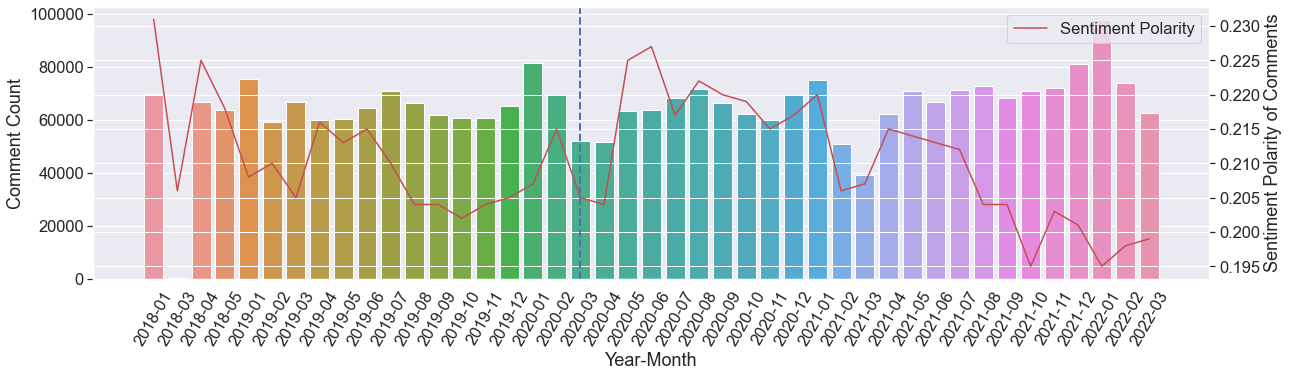

In [10]:
# plot the sentiment polarity vs. date (year-month)
# For this, we'd need to group the sentiments by date (year-month) and
# get the average sentiment of each month

count_C = [1]*len(df_C)
df_C['count'] = pd.Series(count_C).values # so that we can get the count of comments in each year-month category

unique_ym_C = set(df_C['year-month']) # this is just to compare

# Comments
df_C_sentGroup = df_C.groupby('year-month') # group data by year-month's
dates = [] 
means = []
freq = []
for group, subdf in df_C_sentGroup:
    dates.append(group)
    means.append(round(subdf['sentiment'].mean(), 3))
    freq.append(subdf['count'].sum())
    
# creating a dataframe with only Date, Average Sent. Polarity of each month
# and count of Comments
df_C_sentMeans = pd.DataFrame({'Year-Month': dates, 'Sentiment Polarity of Comments': means, 'Comment Count': freq})
df_C_sentMeans['Year-Month'] = pd.to_datetime(df_C_sentMeans['Year-Month'],
                                         format='%Y-%m').dt.strftime('%Y-%m')

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
plt.xticks(rotation=60)
ax2 = ax1.twinx()
sns.barplot(x='Year-Month', y='Comment Count', data=df_C_sentMeans, ax=ax1)
sns.lineplot(x='Year-Month', y='Sentiment Polarity of Comments', data=df_C_sentMeans, ax=ax2, legend='auto', color='r')
plt.legend(labels=['Sentiment Polarity'])
plt.axvline(x='2020-03', linestyle='--', color='b', linewidth=2)
plt.show()

In [11]:
import pymannkendall as mk

data_mk_test_C = df_C_sentMeans['Sentiment Polarity of Comments']

mk.original_test(data_mk_test_C[18:])
#print(df_C_sentMeans)

Mann_Kendall_Test(trend='decreasing', h=True, p=2.0486652018814056e-05, z=-4.2595198344855865, Tau=-0.61, s=-183.0, var_s=1825.6666666666667, slope=-0.0011166666666666668, intercept=0.2254)

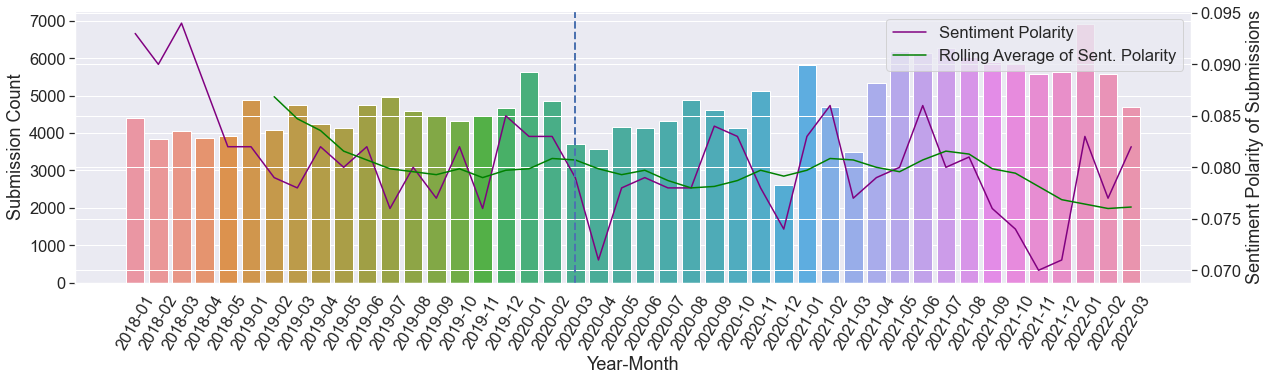

In [12]:

count_S = [1]*len(df_S)
df_S['count'] = pd.Series(count_S).values

unique_ym_S = set(df_S['year-month']) # this is just to compare

# Submissions
dates_S = []
means_S = []
freq_S = []

df_S_sentGroup = df_S.groupby('year-month')
for group, subdf in df_S_sentGroup:
    dates_S.append(group)
    means_S.append(round(subdf['sentiment'].mean(), 3))
    freq_S.append(subdf['count'].sum())


# creating a dataframe with only Date, Average Sent. Polarity of each month
# and count of Submissions

df_S_sentMeans = pd.DataFrame({'Year-Month': dates_S, 'Sentiment Polarity of Submissions': means_S, 'Submission Count': freq_S})
df_S_sentMeans['Year-Month'] = pd.to_datetime(df_S_sentMeans['Year-Month'],
                                         format='%Y-%m').dt.strftime('%Y-%m')

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
plt.xticks(rotation=60)
ax2 = ax1.twinx()
#ax2.set(ylim=(0, 0.20)) # new addition - might delete it later
sns.barplot(x='Year-Month', y='Submission Count', data=df_S_sentMeans, ax=ax1)
sns.lineplot(x='Year-Month', y='Sentiment Polarity of Submissions', data=df_S_sentMeans, ax=ax2, color='purple')
# adding a lineplot for Moving Average in the following line of code
rolling_avg = df_S_sentMeans['Sentiment Polarity of Submissions'].rolling(window=7).mean()
df_S_sentMeans['Rolling Average'] = rolling_avg.values
sns.lineplot(x='Year-Month', y='Rolling Average', data=df_S_sentMeans, ax=ax2, color='green')

plt.legend(labels=['Sentiment Polarity', 'Rolling Average of Sent. Polarity'])
plt.axvline(x='2020-03', linestyle='--', color='b', linewidth=2)
plt.show()

In [13]:
# will do a trend line test using pymannkendall 

data_mk_test = df_S_sentMeans['Sentiment Polarity of Submissions'].tolist()

mk.original_test(data_mk_test[25:]) # trend test shows that there is 'no trend' after covid started although
                                    # trend test shows 'decreasing' for the entire period

Mann_Kendall_Test(trend='no trend', h=False, p=0.19340129350795565, z=-1.3005828119506082, Tau=-0.2222222222222222, s=-38.0, var_s=809.3333333333334, slope=-0.0003076923076923069, intercept=0.08276923076923076)

In [14]:
# Now, we will extract from four groups of data: submissions BEFORE COVID, submissions DURING COVID, comments
# BEFORE COVID and comments DURING COVID (we had split the date into four separate dataframes earlier)

# First tri-grams for COMMENTS BEFORE COVID
tri_before_C = getNGrams(beforedf_C, 'body', 3) # the output is a list
tri_before_C[:15]

[('one-day-time', 14790),
 ('keep-good-work', 3547),
 ('wo-drink-today', 3061),
 ('woody-gt-gt', 2897),
 ('good-luck-iwndwyt', 2828),
 ('take-one-day', 2230),
 ('keep-coming-back', 2058),
 ('naked-mind-annie', 1969),
 ('mind-annie-grace', 1967),
 ('wont-drink-today', 1830),
 ('feel-much-better', 1827),
 ('iwndwyt-woody-gt', 1788),
 ('let-us-know', 1764),
 ('read-naked-mind', 1735),
 ('keep-us-posted', 1704)]

In [15]:
# Quad-grams for COMMENTS BEFORE COVID
quad_before_C = getNGrams(beforedf_C, 'body', 4)
quad_before_C[:15]

[('take-one-day-time', 2109),
 ('naked-mind-annie-grace', 1963),
 ('iwndwyt-woody-gt-gt', 1786),
 ('one-day-time-iwndwyt', 1196),
 ('alcohol-explained-william-porter', 784),
 ('keep-good-work-iwndwyt', 730),
 ('hope-feel-better-soon', 710),
 ('taking-one-day-time', 691),
 ('keep-us-posted-iwndwyt', 544),
 ('naked-mind-alcohol-explained', 533),
 ('best-decision-ever-made', 483),
 ('let-us-know-goes', 407),
 ('best-wishes-friend-drink', 398),
 ('wishes-friend-drink-today', 396),
 ('luck-keep-us-posted', 387)]

In [16]:
# Tri-grams for COMMENTS DURING COVID
tri_during_C = getNGrams(afterdf_C, 'body', 3)
tri_during_C[:15]

[('one-day-time', 20803),
 ('keep-good-work', 4417),
 ('good-luck-iwndwyt', 3050),
 ('take-one-day', 2997),
 ('keep-coming-back', 2823),
 ('im-gon-na', 2659),
 ('feel-much-better', 2339),
 ('keep-great-work', 2267),
 ('day-time-iwndwyt', 2172),
 ('im-glad-youre', 2130),
 ('naked-mind-annie', 2102),
 ('wo-drink-today', 2094),
 ('mind-annie-grace', 2083),
 ('good-morning-sd', 1999),
 ('every-single-day', 1988)]

In [17]:
# Quad-grams for COMMENTS DURING COVID
quad_during_C = getNGrams(afterdf_C, 'body', 4)
quad_during_C[:15]

[('take-one-day-time', 2854),
 ('naked-mind-annie-grace', 2079),
 ('one-day-time-iwndwyt', 1995),
 ('hope-feel-better-soon', 1014),
 ('taking-one-day-time', 974),
 ('alcohol-explained-william-porter', 941),
 ('days-days-days-days', 764),
 ('keep-good-work-iwndwyt', 720),
 ('naked-mind-alcohol-explained', 584),
 ('keep-fighting-good-fight', 563),
 ('hungry-angry-lonely-tired', 557),
 ('best-decision-ever-made', 553),
 ('one-day-time-one', 540),
 ('iwndwyt-woody-gt-gt', 492),
 ('one-day-time-friend', 481)]

In [18]:
# Now, we repeat the same steps for the submissions
# First tri-grams for COMMENTS BEFORE COVID
tri_before_S = getNGrams(beforedf_S, 'selftext', 3) # the output is a list
tri_before_S[:15]

[('one-day-time', 1632),
 ('100-100-100', 1039),
 ('next-24-hours', 881),
 ('feel-like-im', 707),
 ('every-single-day', 600),
 ('feel-like-shit', 578),
 ('im-gon-na', 543),
 ('long-story-short', 513),
 ('sober-long-time', 493),
 ('three-day-bender', 442),
 ('long-time-want', 441),
 ('make-conscious-decision', 439),
 ('one-thing-common', 435),
 ('24-hour-pledge', 435),
 ('decide-drink-today', 430)]

In [19]:
quad_before_S = getNGrams(beforedf_S, 'selftext', 4)
quad_before_S[:15]

[('100-100-100-100', 1038),
 ('alcohol-next-24-hours', 425),
 ('sober-long-time-want', 424),
 ('sounds-simple-us-know', 424),
 ('simple-us-know-hard', 424),
 ('us-know-hard-sometimes', 424),
 ('know-hard-sometimes-impossible', 424),
 ('one-person-decide-drink', 424),
 ('person-decide-drink-today', 424),
 ('decide-drink-today-give', 424),
 ('drink-today-give-person', 424),
 ('today-give-person-right', 424),
 ('give-person-right-mindset', 424),
 ('simple-thread-commit-drinking', 424),
 ('thread-commit-drinking-alcohol', 424)]

In [20]:
tri_during_S = getNGrams(afterdf_S, 'selftext', 3) # the output is a list
tri_during_S[:15]

[('one-day-time', 2228),
 ('feel-like-im', 1301),
 ('next-24-hours', 1248),
 ('im-gon-na', 983),
 ('feel-like-shit', 926),
 ('every-single-day', 887),
 ('sober-long-time', 704),
 ('long-story-short', 699),
 ('since-last-drink', 653),
 ('long-time-want', 637),
 ('long-time-lurker', 636),
 ('three-day-bender', 636),
 ('feeling-like-shit', 616),
 ('one-thing-common', 613),
 ('make-conscious-decision', 608)]

In [21]:
quad_during_S = getNGrams(afterdf_S, 'selftext', 4)
quad_during_S[:15]

[('may-anonymous-strangers-internet', 602),
 ('anonymous-strangers-internet-one', 602),
 ('strangers-internet-one-thing', 602),
 ('internet-one-thing-common', 602),
 ('one-thing-common-may', 602),
 ('thing-common-may-world', 602),
 ('common-may-world-apart', 602),
 ('may-world-apart-together', 602),
 ('three-day-bender-sober', 602),
 ('one-person-decide-drink', 602),
 ('person-decide-drink-today', 602),
 ('decide-drink-today-give', 602),
 ('drink-today-give-person', 602),
 ('today-give-person-right', 602),
 ('give-person-right-mindset', 602)]

In [8]:
# Now will do the LIWC (Linguistic Inquiry and Word Count) analysis so we need to import the LIWC files

# Will work on the stopdrinking data first and then go back to stopsmoking
path = '/Users/nayza/Downloads/'
dfS_liwc = pd.read_csv(path+'stopdrinking_submissions_LIWC.csv', low_memory=False)
dfC_liwc = pd.read_csv(path+'stopdrinking_comments_LIWC.csv', low_memory=False)


In [10]:
# Here we would need to drop the unnecessary columns which have the NaN values
pd.set_option('display.max_columns', None)
dfS_liwc.head()

,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,can_mod_post,contest_mode,created_utc,domain,full_link,gilded,id,is_crosspostable,is_original_content,is_reddit_media_domain,is_self,is_video,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,rte_mode,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,url,whitelist_status,wls,created,link_flair_background_color,link_flair_css_class,link_flair_text,post_hint,preview,author_cakeday,edited,author_flair_background_color,author_flair_text_color,crosspost_parent,crosspost_parent_list,archived,author_created_utc,author_flair_template_id,author_fullname,author_patreon_flair,can_gild,category,content_categories,distinguished,gildings,hidden,is_meta,is_robot_indexable,link_flair_template_id,media,media_embed,quarantine,removal_reason,secure_media,secure_media_embed,subreddit_name_prefixed,suggested_sort,thumbnail_height,thumbnail_width,banned_by,brand_safe,previous_visits,all_awardings,total_awards_received,updated_utc,allow_live_comments,author_premium,awarders,steward_reports,removed_by_category,removed_by,og_description,og_title,treatment_tags,upvote_ratio,url_overridden_by_dest,author_is_blocked,is_created_from_ads_ui,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233
0,doihavetocommit,NaN,[],NaN,text,FALSE,FALSE,1527738637,self.stopdrinking,https://www.reddit.com/r/stopdrinking/comments...,0,8nf24p,FALSE,0,FALSE,TRUE,FALSE,[],dark,text,FALSE,0,1,9,0,FALSE,no_ads,/r/stopdrinking/comments/8nf24p/in_2_hours_it_...,FALSE,0,1527738639,markdown,39,I start hiking the Appalachian trail tomorrow....,1,FALSE,FALSE,stopdrinking,t5_2s7yr,115436,public,self,In 2 hours it will be 25 days,https://www.reddit.com/r/stopdrinking/comments...,no_ads,0,1527753037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,8.16,1.00,99.00,3.31,7.00,26.19,85.71,50,26.19,23.81,23.81,0.00,0.00,0.0,0.0,2.38,2.38,7.14,11.90,2.38,4.76,4.76,19.05,9.52,2.38,0.00,0.00,0.00,7.14,2.38,4.76,2.38,0.00,0.00,4.76,0.0,0.00,0.00,0.0,9.52,2.38,0.00,2.38,2.38,0.00,2.38,0.00,0.0,0.00,0.00,4.76,0.00,2.38,0.0,4.76,7.14,2.38,7.14,2.38,2.38,0.00,0.00,16.67,4.76,11.90,4.76,2.38,4.76,0.00,11.90,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,16.67,7.14,0.00,0.0,0.0,0.00,4.76,0.0,0.0,4.76,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cloud_messenger,NaN,[],NaN,text,FALSE,FALSE,1527737888,self.stopdrinking,https://www.reddit.com/r/stopdrinking/comments...,

In [11]:
dfS = dfS_liwc.dropna(subset=['selftext'])

In [12]:
dfC_liwc.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,AV,AW,AX,AY,AZ,BA,BB,BC,BD,BE,BF,BG,BH,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,BurnerPerkins,1.507734e+09,year1,NaN,1806 days,t2_dyv13tk,Definitely was in my top five reasons!,True,0.0,1527739163,NaN,0.0,dzv2zhd,False,t3_8neen1,1.0,1.0,t3_8neen1,/r/stopdrinking/comments/8neen1/did_anyone_sto...,5591.0,1.528180e+09,3,0.0,1.0,False,stopdrinking,t5_2s7yr,public,1527753563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,29.30,7.67,99.00,99.00,7.00,28.57,100.00,57.14,14.29,14.29,14.29,0.00,0.00,0.0,0.0,0.00,0.00,14.29,14.29,14.29,0.00,0.00,14.29,14.29,14.29,0.00,14.29,0.00,14.29,14.29,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,28.57,14.29,14.29,0.00,0.00,14.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,14.29,0.00,14.29,14.29,0.00,0.00,14.29,0.00,0.00,28.57,0.00,28.57,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,14.29,0.00,0.00,0.00,0.00,0.0,14.29,0.00,0.0,0.00,0.00,0.00
1,TheWoodBotherer,1.461178e+09,month11,NaN,341 days,t2_xbs0q,"Oh yes, I forgot about that!A day or two of no...",True,0.0,1527739141,NaN,0.0,dzv2ysn,False,t3_8nesei,3.0,1.0,t1_dzv2kq1,/r/stopdrinking/comments/8nesei/how_you_felt_a...,486.0,1.528180e+09,1,0.0,1.0,False,stopdrinking,t5_2s7yr,public,1527753541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156,47.59,73.93,38.39,49.64,39.00,15.38,88.46,50.00,16.03,8.97,2.56,0.00,6.41,0.0,0.0,7.05,5.13,11.54,7.69,5.77,7.69,1.28,15.38,5.77,3.21,0.64,0.64,3.85,6.41,3.85,2.56,0.0,0.64,0.64,7.69,0.0,0.0,0.0,0.0,13.46,3.85,2.56,1.92,5.13,0.64,3.85,3.85,0.00,0.0,1.92,10.90,1.92,2.56,0.0,6.41,7.69,1.28,1.92,2.56,2.56,0.64,3.85,8.97,2.56,10.90,1.92,5.13,5.13,0.00,0.64,0.0,0.0,0.0,0.0,2.56,0.0,1.28,0.64,0.64,0.0,30.77,11.54,10.26,0.64,0.64,0.0,1.92,1.92,0.0,2.56,0.00,1.28
2,sioxent,1.523659e+09,NaN,NaN,NaN,t2_16up1pyw,Oh no lol I kind of wanted to see the forum bu...,True,0.0,1527739128,NaN,0.0,dzv2yf4,True,t3_8n95dw,2.0,1.0,t1_dzv0ui2,/r/stopdrinking/comments/8n95dw/trying_to_mode...,2489.0,1.528180e+09,1,0.0,1.0,False,stopdrinking,t5_2s7yr,public,1527753528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,38.60,1.00,15.86,99.00,20.00,15.00,85.00,50.00,15.00,10.00,10.00,0.00,0.00,0.0,0.0,5.00,5.00,10.00,10.00,0.00,5.00,10.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,10.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,15.00,0.00,0.00,5.00,5.00,0.00,5.00,5.00,5.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,5.00,5.00,5.00,0.00,0.00,5.00,0.00,0.00,0.0,0.0,0.0,0.0,15.00,0.0,10.00,0.00,5.00,0.0,5.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,5.00,0.00,0.00
3,cloud_messenger,1.449241e+09,NaN,NaN,NaN,t2_so7uc,Thank you for responding. I have been drinking...,True,0.0,1527739123,NaN,0.0,dzv2y9f,True,t3_8neyno,2.0,1.0,t1_dzv2863,/r/stopdrinking/comments/8neyno/i_need_to_stop...,892.0,1.528180e+09,2,0.0,1.0,False,stopdrinking,t5_2s7yr,public,1527753523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,40.38,50.00,99.00,49.64,11.14,12.82,98.72,56.41,17.95,10.26,7.69,1.28,1.28,0.0,0.0,7.69,3.85,16.67,8.97,10.26,7.69,0.00,19.23,6.41,3

In [13]:
dfC = dfC_liwc.dropna(subset=['G'])

In [14]:
dfS_liwc.columns.tolist()

['author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gilded',
 'id',
 'is_crosspostable',
 'is_original_content',
 'is_reddit_media_domain',
 'is_self',
 'is_video',
 'link_flair_richtext',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'pwls',
 'retrieved_on',
 'rte_mode',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'thumbnail',
 'title',
 'url',
 'whitelist_status',
 'wls',
 'created',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_text',
 'post_hint',
 'preview',
 'author_cakeday',
 'edited',
 'author_flair_background_color',
 'author_flair_text_color',
 'crosspost_parent',
 'crosspost_parent_lis

In [15]:
# Now, we have dropped the rows with missing entries.
# Next, we have to split the two data sets into BEFORE and DURING COVID based on 'created_utc' column.
# BUT the column names are somehow different

In [16]:
print(type(dfS['created_utc'].tolist()[0]))
print(type(dfC['AC'].tolist()[0])) # Somehow the 'created_utc' column in comments data set got renamed to 'AC'

<class 'str'>
<class 'int'>


In [17]:
# debugging: there is at least one row in created_utc that can't be converted to int from str

odd_vals = []
for utc in dfS['created_utc'].tolist():
    try:
        temp = int(utc)
    except ValueError:
        odd_vals.append(utc)
        
odd_vals

[' &lt;em&gt;everyone goes a little mad-hatter along the way.&lt;/em&gt;&lt;/p&gt;\\n\\n&lt;h3&gt;Narconon Scientology Objective Five&lt;/h3&gt;\\n\\n&lt;p&gt;These are the commands and you’re required to spend days on this objective. Up to 9 hours per day. During this exercise',
 ' escaping together',
 ' with tobacco',
 ' and I’m not worried anymore.In time things evened out. It’s still good days overall']

In [18]:
# Odd values in created_utc have been identified. Now will go ahead and drop those rows
odd_vals_set = set(odd_vals)

for utc in dfS['created_utc'].tolist():
    if utc in odd_vals_set:
        dfS = dfS.drop(dfS.index[dfS['created_utc'] == utc])

In [19]:
# the 'created_ufc' column of dfS ended up being a 'str' type somehow so will need to convert back to int

dfS['created_utc'] = dfS['created_utc'].apply(lambda x: int(x))
print(type(dfS['created_utc'].tolist()[0]))

<class 'int'>


In [20]:
# Split both data sets into BEFORE and AFTER COVID
b_dfC =dfC.loc[dfC['AC'] < datetime.datetime(2020, 3, 10, 0, 0).timestamp()]
a_dfC =dfC.loc[dfC['AC'] > datetime.datetime(2020, 3, 11, 0, 0).timestamp()]

b_dfS =dfS.loc[dfS['created_utc'] < datetime.datetime(2020, 3, 10, 0, 0).timestamp()]
a_dfS =dfS.loc[dfS['created_utc'] > datetime.datetime(2020, 3, 11, 0, 0).timestamp()]

In [21]:
len(a_dfS)

137213

In [22]:
# Now that we have split the data into before and during COVID, let's drop the columns that 
# are unnecessary for the t-test. 
# First let's drop all the columns to the left of 'WC'.

# For b_dfC and a_dfC
index = b_dfC.columns.tolist().index('WC')
cols_to_keep = b_dfC.columns.tolist()[index:]
b_dfC2 = b_dfC[cols_to_keep]
a_dfC2 = a_dfC[cols_to_keep]

In [23]:
# For b_dfS and a_dfS
index_start = b_dfS.columns.tolist().index('WC')
index_end = a_dfS.columns.tolist().index('OtherP')
cols_to_keep2 = b_dfS.columns.tolist()[index_start:index_end+1]
b_dfS2 = b_dfS[cols_to_keep2]
a_dfS2 = a_dfS[cols_to_keep2]
b_dfS2.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,42,8.16,1.00,99.00,3.31,7.00,26.19,85.71,50,26.19,23.81,23.81,0.00,0.00,0.0,0.0,2.38,2.38,7.14,11.90,2.38,4.76,4.76,19.05,9.52,2.38,0.00,0.00,0.00,7.14,2.38,4.76,2.38,0.00,0.00,4.76,0.0,0.00,0.00,0.0,9.52,2.38,0.00,2.38,2.38,0.00,2.38,0.00,0.0,0.00,0.00,4.76,0.00,2.38,0.0,4.76,7.14,2.38,7.14,2.38,2.38,0.00,0.00,16.67,4.76,11.90,4.76,2.38,4.76,0.00,11.90,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,16.67,7.14,0.00,0.0,0.0,0.00,4.76,0.0,0.0,4.76,0.00,0.0
1,200,37.26,13.57,95.20,2.89,13.33,12.5,92.50,57.5,20,14.00,13.00,0.00,0.00,0.5,0.5,6.00,4.00,15.00,10.50,4.50,6.00,3.50,20.50,2,1.00,2.00,3.00,2.50,8.5,3,5.50,0.00,2.50,0.50,8.50,2.0,0.50,0.00,0.5,9.50,1.50,1.00,2.00,0.50,2.00,2.50,3.00,2.5,0.00,0.50,3.50,0.50,0.50,0.0,2.50,10.00,4.50,1.50,0.50,1.50,3.00,8.00,11.00,0.00,16.50,1.00,6.00,10.00,0.50,5.00,1.00,0.00,0.50,0.5,1.00,0.50,0.00,0.0,0.00,0.0,14.50,7.50,3.00,0.0,0.0,0.00,0.00,0.5,0.0,3.50,0.00,0.0
2,58,16.68,2.91,99.00,85.87,7.25,10.34,93.10,55.17,15.52,12.07,12.07,0.00,0.00,0.0,0.0,3.45,3.45,8.62,10.34,5.17,12.07,3.45,17.24,3.45,0.00,0.00,5.17,1.72,3.45,3.45,0.00,0.00,0.00,0.00,1.72,0.0,1.72,1.72,0.0,12.07,3.45,0.00,1.72,1.72,3.45,5.17,3.45,0.0,1.72,1.72,5.17,0.00,0.00,0.0,5.17,5.17,1.72,0.00,1.72,1.72,0.00,12.07,6.90,3.45,18.97,5.17,1.72,12.07,0.00,3.45,0.00,0.00,1.72,0.0,5.17,0.00,3.45,0.0,1.72,0.0,27.59,0.00,10.34,0.0,0.0,0.00,13.79,0.0,0.0,3.45,0.00,0.0
3,42,48.63,31.71,80.64,25.77,14.00,14.29,95.24,61.9,19.05,16.67,9.52,0.00,7.14,0.0,0.0,2.38,4.76,19.05,16.67,2.38,2.38,4.76,21.43,4.76,0.00,0.00,2.38,2.38,9.52,4.76,4.76,2.38,0.00,0.00,9.52,0.0,0.00,0.00,0.0,16.67,0.00,4.76,2.38,2.38,2.38,4.76,2.38,0.0,0.00,2.38,7.14,2.38,2.38,0.0,2.38,7.14,2.38,0.00,4.76,0.00,0.00,4.76,21.43,0.00,14.29,0.00,7.14,7.14,0.00,2.38,0.00,0.00,0.00,0.0,2.38,2.38,0.00,0.0,0.00,0.0,11.90,4.76,0.00,0.0,0.0,2.38,0.00,0.0,0.0,4.76,0.00,0.0
4,316,34.36,7.73,98.91,3.95,15.80,16.46,89.24,57.91,17.09,12.34,11.08,0.63,0.63,0.0,0.0,4.75,6.33,12.03,10.76,7.28,7.28,2.53,18.99,5.7,2.22,0.32,0.63,1.58,6.65,2.22,4.43,1.27,0.95,1.58,2.53,0.0,0.63,0.00,0.0,14.24,4.11,2.22,0.95,1.27,2.53,4.11,2.22,0.0,0.00,1.90,3.48,0.95,1.90,0.0,1.90,5.06,1.58,0.95,1.58,0.95,0.63,4.11,13.92,0.63,16.46,1.90,6.33,8.54,0.63,0.63,0.32,0.32,0.00,0.0,1.27,0.32,0.32,0.0,0.63,0.0,18.04,7.28,6.65,0.0,0.0,0.00,0.00,0.0,0.0,3.48,0.63,0.0


In [24]:
cols_to_keep == cols_to_keep2

True

In [ ]:
# Finally we can do the t-test between BEFORE data sets and DURING/AFTER data sets.

from scipy.stats import ttest_ind

# First, let's do it for Comments data set (i.e. comparing BEFORE and AFTER for Comments)
cols_with_small_p_C = set()
for col in cols_to_keep:
    vals1 = b_dfC2[col].tolist()
    vals2 = a_dfC2[col].tolist()
    p_val = round(ttest_ind(vals1, vals2)[1], 4)
    if p_val < 0.05:
        cols_with_small_p_C.add(col)
        print("BEFORE COVID: ")
        print(b_dfC2[col].describe())
        print("DURING COVID: ")
        print(a_dfC2[col].describe())
        print(p_val)
        print('-------------------------------------')
        print()
        

In [40]:
# Latest addition: Instead of just outputting 'BEFORE COVID...' and 'AFTER COVID...' as in the last cell, we can do
# output the results into a dataframe and ultimately to be a csv file.

# Will need to do for loop over all the columns with p<0.05 and store the count, mean, std and p-value of 
# those columns.

means = []
stds = []
p_vals = []

for col in list(cols_with_small_p_C):
    means.append((round(b_dfC2[col].mean(), 4), round(a_dfC2[col].mean(), 4)))
    stds.append((round(b_dfC2[col].std(), 4), round(a_dfC2[col].std(), 4)))
    vals1 = b_dfC2[col].tolist()
    vals2 = a_dfC2[col].tolist()
    p_val = ttest_ind(vals1, vals2)[1]
    p_vals.append(p_val)
    
dict_res_C = {'Column': list(cols_with_small_p_C), 'Mean B&D COVID': means, 'STD B&D COVID': stds,
             'P-value': p_vals}
df_res_C = pd.DataFrame(dict_res_C)
                

In [44]:
#df_res_C.to_csv(path+'ttest_res_C.csv')

In [45]:
# Before repeating the same thing for Submissions data set, we need to convert some columns to int/float
# since they are currently str type

# Some NaN values remaining so removing them first.
b_dfS2 = b_dfS2.dropna()
a_dfS2 = a_dfS2.dropna()

In [46]:
for col in cols_to_keep:
    if type(b_dfS2[col].tolist()[0]) == str:
        b_dfS2[col] = b_dfS2[col].apply(lambda x: float(x))
        a_dfS2[col] = a_dfS2[col].apply(lambda x: float(x))

In [47]:
# Now, let's do it for Submissions data set (i.e. comparing BEFORE and AFTER for Submissions)
cols_with_small_p_S = set()
for col in cols_to_keep:
    vals1 = b_dfS2[col].tolist()
    vals2 = a_dfS2[col].tolist()
    p_val = round(ttest_ind(vals1, vals2)[1], 4)
    if p_val < 0.05:
        cols_with_small_p_S.add(col)
        print("BEFORE COVID: ")
        print(b_dfS2[col].describe())
        print("DURING COVID: ")
        print(a_dfS2[col].describe())
        print(p_val)
        print('-------------------------------------')
        print()

BEFORE COVID: 
count    92000.000000
mean       148.196489
std        169.623970
min          0.000000
25%         48.000000
50%        101.000000
75%        190.000000
max       5557.000000
Name: WC, dtype: float64
DURING COVID: 
count    137212.000000
mean        136.258235
std         163.133069
min           0.000000
25%          40.000000
50%          93.000000
75%         176.000000
max        5650.000000
Name: WC, dtype: float64
0.0
-------------------------------------

BEFORE COVID: 
count    92000.000000
mean        42.546138
std         26.994602
min          0.000000
25%         20.710000
50%         38.600000
75%         61.100000
max         99.000000
Name: Analytic, dtype: float64
DURING COVID: 
count    137212.000000
mean         43.519494
std          28.336486
min           0.000000
25%          20.260000
50%          38.770000
75%          63.580000
max          99.000000
Name: Analytic, dtype: float64
0.0
-------------------------------------

BEFORE COVID: 
count  

In [51]:
# Repeating the same for SUBMISSION data with getting the results outputed to a csv file.
del means
del stds
del p_vals

means = []
stds = []
p_vals = []

for col in list(cols_with_small_p_S):
    means.append((round(b_dfS2[col].mean(), 4), round(a_dfS2[col].mean(), 4)))
    stds.append((round(b_dfS2[col].std(), 4), round(a_dfS2[col].std(), 4)))
    vals1 = b_dfS2[col].tolist()
    vals2 = a_dfS2[col].tolist()
    p_val = ttest_ind(vals1, vals2)[1]
    p_vals.append(p_val)
    
dict_res_S = {'Column': list(cols_with_small_p_S), 'Mean B&D COVID': means, 'STD B&D COVID': stds,
             'P-value': p_vals}
df_res_S = pd.DataFrame(dict_res_S)

#df_res_S.to_csv(path+'ttest_res_S.csv')

In [52]:
df_res_S.head()

,Column,Mean B&D COVID,STD B&D COVID,P-value
0,Period,"(7.2575, 6.9006)","(6.4677, 6.7791)",2.765529e-36
1,space,"(5.4772, 5.2196)","(3.4346, 3.5972)",1.303763e-65
2,see,"(0.5409, 0.5031)","(1.1776, 1.1754)",4.541748e-14
3,time,"(8.1459, 7.9693)","(5.0493, 5.4437)",4.665190e-15
4,ppron,"(11.2091, 10.7543)","(5.0283, 5.4768)",4.842374e-90


In [91]:
# Repeating the exact same steps in getting the t-test results for stopsmoking data

dfC = pd.read_csv(path+'stopsmoking_allcomments_LIWC.csv')
dfS = pd.read_csv(path+'stopsmoking_allsubmissions_LIWC.csv')

In [100]:
dfC['body'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: body, dtype: float64

In [96]:
dfC.drop(columns=['body'], inplace=True)

In [98]:
dfC.rename(columns={'body.1': 'body'}, inplace=True)

In [101]:
# Splitting the stopsmoking data by March 11, 2020 data

bdfC =dfC.loc[dfC['created_utc'] < datetime.datetime(2020, 3, 10, 0, 0).timestamp()]
adfC =dfC.loc[dfC['created_utc'] > datetime.datetime(2020, 3, 11, 0, 0).timestamp()]

bdfS =dfS.loc[dfS['created_utc'] < datetime.datetime(2020, 3, 10, 0, 0).timestamp()]
adfS =dfS.loc[dfS['created_utc'] > datetime.datetime(2020, 3, 11, 0, 0).timestamp()]

In [102]:
b_dfC = bdfC[cols_to_keep]
a_dfC = adfC[cols_to_keep]

b_dfS = bdfS[cols_to_keep]
a_dfS = adfS[cols_to_keep]

b_dfC.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,6,18.82,50.00,23.51,25.77,6,16.67,100.00,50.00,16.67,16.67,0.00,0.0,16.67,0.0,0.0,0.00,0.00,16.67,16.67,0.00,0.00,16.67,33.33,0.0,0.00,0.00,0.00,0.00,33.33,16.67,16.67,16.67,0.0,0.0,16.67,0.0,0.00,0.0,0.00,16.67,0.0,0.00,0.0,0.0,0.00,16.67,16.67,16.67,0.0,0.00,0.0,0.0,0.0,0.0,0.0,16.67,0.0,0.00,0.00,16.67,0.00,0.00,33.33,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
1,9,98.87,86.68,4.97,25.77,9,33.33,66.67,33.33,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,11.11,11.11,11.11,0.00,0.00,0.00,22.22,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,11.11,0.0,11.11,0.0,11.11,0.00,0.0,0.00,0.0,0.0,0.00,0.00,11.11,11.11,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,11.11,0.0,11.11,11.11,11.11,11.11,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
2,16,11.86,1.00,95.60,25.77,16,25.00,100.00,43.75,18.75,12.50,12.50,0.0,0.00,0.0,0.0,6.25,0.00,6.25,6.25,6.25,6.25,6.25,18.75,12.5,6.25,0.00,0.00,6.25,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,31.25,12.5,6.25,0.0,12.5,0.00,6.25,6.25,0.00,0.0,6.25,0.0,0.0,0.0,0.0,0.0,6.25,0.0,6.25,0.00,0.00,0.00,6.25,6.25,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.25,0.0,0.0,6.25,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
3,19,6.56,5.73,99.00,97.58,19,15.79,89.47,63.16,21.05,5.26,5.26,0.0,0.00,0.0,0.0,15.79,0.00,15.79,5.26,15.79,10.53,5.26,10.53,0.0,0.00,5.26,5.26,0.00,5.26,5.26,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,15.79,0.0,5.26,0.0,0.0,5.26,5.26,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,10.53,0.0,0.00,0.00,5.26,5.26,5.26,5.26,0.0,31.58,5.26,10.53,15.79,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
4,3,93.26,50.00,98.01,25.77,3,0.00,100.00,66.67,33.33,0.00,0.00,0.0,0.00,0.0,0.0,33.33,0.00,33.33,0.00,0.00,0.00,0.00,33.33,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.00,33.33,0.00,0.00,0.00,33.33,0.0,33.33,0.00,33.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0


In [112]:
# Literally repeating the same code from above. Now for Comments
del means
del stds
del p_vals

means = []
stds = []
p_vals = []
cols = []

for col in b_dfC.columns.tolist():
    vals1 = b_dfC[col].tolist()
    vals2 = a_dfC[col].tolist()
    p_val = ttest_ind(vals1, vals2)[1]
    if p_val < 0.05:
        cols.append(col)
        p_vals.append(p_val)
        means.append((round(b_dfC[col].mean(), 4), round(a_dfC[col].mean(), 4)))
        stds.append((round(b_dfC[col].std(), 4), round(a_dfC[col].std(), 4)))
    
    
dict_res_C = {'Column': cols, 'Mean B&D COVID': means, 'STD B&D COVID': stds,
             'P-value': p_vals}
df_res_C = pd.DataFrame(dict_res_C)

In [117]:
# df_res_C.to_csv(path+'ttest_res_C_stopsmoke.csv')